In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot as plt
from statistics import mean

In [2]:
working_dic= os.getcwd()
train_dic=working_dic+'/compas-scores-two-years.csv'
print(train_dic)

/Users/mehersuneelmeesala/Desktop/GMU_COURSES/GMU_HW/584-project/compas-scores-two-years.csv


In [3]:
train_set= pd.read_csv(train_dic)

In [4]:
train_set

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


## DATA-PREPROCESSING

In [5]:
train_set.head()

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7214 entries, 0 to 7213
Data columns (total 53 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7214 non-null   int64  
 1   name                     7214 non-null   object 
 2   first                    7214 non-null   object 
 3   last                     7214 non-null   object 
 4   compas_screening_date    7214 non-null   object 
 5   sex                      7214 non-null   object 
 6   dob                      7214 non-null   object 
 7   age                      7214 non-null   int64  
 8   age_cat                  7214 non-null   object 
 9   race                     7214 non-null   object 
 10  juv_fel_count            7214 non-null   int64  
 11  decile_score             7214 non-null   int64  
 12  juv_misd_count           7214 non-null   int64  
 13  juv_other_count          7214 non-null   int64  
 14  priors_count            

In [7]:
df=train_set

In [8]:
df

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [9]:
df.head(1)

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0


In [10]:
num=df['score_text']
num=set(num)
print(num)

{'Medium', 'High', 'Low'}


In [11]:
africanAmerican=[]
asian=[]
caucasian=[]
hispanic=[]
nativeAmerican=[]
other=[]
for i, j in df.iterrows():
    #print(i)
    #print(j)
    #print(j.race)
    if(j.race=='African-American'):
        africanAmerican.append(1)
    else:
        africanAmerican.append(0)
        
        
    if(j.race=='Caucasian'):
        caucasian.append(1)
    else:
        caucasian.append(0)
        
        
    if(j.race=='Asian'):
        asian.append(1)
    else:
        asian.append(0)
        
        
    if(j.race=='Hispanic'):
        hispanic.append(1)
    else:
        hispanic.append(0)
        
        
    if(j.race=='Native American'):
        nativeAmerican.append(1)
    else:
        nativeAmerican.append(0)
        
        
    if(j.race=='Other'):
        other.append(1)
    else:
        other.append(0)


In [12]:
#removed , , 'decile_score', ,'is_recid'

selected_columns=['sex','age_cat','race', 'juv_fel_count', 'juv_misd_count', 'juv_other_count', 'priors_count','days_b_screening_arrest', 'c_charge_degree','c_days_from_compas', 'is_violent_recid','type_of_assessment', 'score_text', 'two_year_recid']



In [13]:
data=df[selected_columns].iloc[:,:]

In [14]:
data

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,c_days_from_compas,is_violent_recid,type_of_assessment,score_text,two_year_recid
0,Male,Greater than 45,Other,0,0,0,0,-1.0,F,1.0,0,Risk of Recidivism,Low,0
1,Male,25 - 45,African-American,0,0,0,0,-1.0,F,1.0,1,Risk of Recidivism,Low,1
2,Male,Less than 25,African-American,0,0,1,4,-1.0,F,1.0,0,Risk of Recidivism,Low,1
3,Male,Less than 25,African-American,0,1,0,1,NaN,F,1.0,0,Risk of Recidivism,High,0
4,Male,25 - 45,Other,0,0,0,2,NaN,F,76.0,0,Risk of Recidivism,Low,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,Male,Less than 25,African-American,0,0,0,0,-1.0,F,1.0,0,Risk of Recidivism,Medium,0
7210,Male,Less than 25,African-American,0,0,0,0,-1.0,F,1.0,0,Risk of Recidivism,Low,0
7211,Male,Greater than 45,Other,0,0,0,0,-1.0,F,1.0,0,Risk of Recidivism,Low,0
7212,Female,25 - 45,African-American,0,0,0,3,-1.0,M,1.0,0,Risk of Recidivism,Low,0


In [15]:
data['African-American'] = africanAmerican
data['Caucasian'] = caucasian
data['Hispanic'] = hispanic
data['Native-American'] = nativeAmerican
data['Other'] = other
data['Asian'] = asian

/var/folders/f7/5_rs0ln121z7hspqcqtqhk2c0000gn/T/ipykernel_18997/2221351614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['African-American'] = africanAmerican
/var/folders/f7/5_rs0ln121z7hspqcqtqhk2c0000gn/T/ipykernel_18997/2221351614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Caucasian'] = caucasian
/var/folders/f7/5_rs0ln121z7hspqcqtqhk2c0000gn/T/ipykernel_18997/2221351614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [16]:
#sex:
    #Male=0
    #Female=1
#age_cat: 
    #Less than 25=-1
    #25-45=0
    #greater than 45=1
#race:
    #African-American=0
    #Asian=1
    #Caucasian=2
    #Hispanic=3
    #Native American=4
    #Other=5
#c_charge_degree:
    #misdemeanor=0
    #felony=1
#type_of_assessment:
    #Risk of Recidivism:0
    #Risk of Violence:1
#type_of_assessment:
    #Risk of Recidivism:0
    #Risk of Violence:1
#score_text:
    #low=0
    #medium=1
    #high=2

In [17]:
#sex
data.loc[data['sex'] == 'Female', 'sex'] = 1
data.loc[data['sex'] == 'Male', 'sex'] = 0
#age_cat
data.loc[data['age_cat'] == 'Less than 25', 'age_cat'] = -1
data.loc[data['age_cat'] == '25 - 45', 'age_cat'] = 0
data.loc[data['age_cat'] == 'Greater than 45', 'age_cat'] = 1
#race
data.loc[data['race'] == 'African-American', 'race'] = 0
data.loc[data['race'] == 'Asian', 'race'] = 1
data.loc[data['race'] == 'Caucasian', 'race'] = 2
data.loc[data['race'] == 'Hispanic', 'race'] = 3
data.loc[data['race'] == 'Native American', 'race'] = 4
data.loc[data['race'] == 'Other', 'race'] = 5
#c_charge_degree
data.loc[data['c_charge_degree'] == 'M', 'c_charge_degree'] = 0
data.loc[data['c_charge_degree'] == 'F', 'c_charge_degree'] = 1
#score_text
data.loc[data['score_text'] == 'Low', 'score_text'] = 0
data.loc[data['score_text'] == 'Medium', 'score_text'] = 1
data.loc[data['score_text'] == 'High', 'score_text'] = 2
#type_of_assessment:
data.loc[data['type_of_assessment'] == 'Risk of Recidivism', 'type_of_assessment'] = 0
data.loc[data['type_of_assessment'] == 'Risk of Violence', 'type_of_assessment'] = 1
#type_of_assessment:
data.loc[data['two_year_recid'] == 0, 'two_year_recid'] = -1


In [18]:
data

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,c_days_from_compas,is_violent_recid,type_of_assessment,score_text,two_year_recid,African-American,Caucasian,Hispanic,Native-American,Other,Asian
0,0,1,5,0,0,0,0,-1.0,1,1.0,0,0,0,-1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,-1.0,1,1.0,1,0,0,1,1,0,0,0,0,0
2,0,-1,0,0,0,1,4,-1.0,1,1.0,0,0,0,1,1,0,0,0,0,0
3,0,-1,0,0,1,0,1,NaN,1,1.0,0,0,2,-1,1,0,0,0,0,0
4,0,0,5,0,0,0,2,NaN,1,76.0,0,0,0,-1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,0,-1,0,0,0,0,0,-1.0,1,1.0,0,0,1,-1,1,0,0,0,0,0
7210,0,-1,0,0,0,0,0,-1.0,1,1.0,0,0,0,-1,1,0,0,0,0,0
7211,0,1,5,0,0,0,0,-1.0,1,1.0,0,0,0,-1,0,0,0,0,1,0
7212,1,0,0,0,0,0,3,-1.0,0,1.0,0,0,0,-1,1,0,0,0,0,0


In [19]:
data=data.dropna()

In [20]:
x= data.loc[:, ~data.columns.isin(['two_year_recid', 'Other', 'Asian', 'African-American','Caucasian','Hispanic','Native-American' ])]
y = data['two_year_recid'].astype('int')

In [21]:
x

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,c_days_from_compas,is_violent_recid,type_of_assessment,score_text
0,0,1,5,0,0,0,0,-1.0,1,1.0,0,0,0
1,0,0,0,0,0,0,0,-1.0,1,1.0,1,0,0
2,0,-1,0,0,0,1,4,-1.0,1,1.0,0,0,0
5,0,0,5,0,0,0,0,0.0,0,0.0,0,0,0
6,0,0,2,0,0,0,14,-1.0,1,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,0,-1,0,0,0,0,0,-1.0,1,1.0,0,0,1
7210,0,-1,0,0,0,0,0,-1.0,1,1.0,0,0,0
7211,0,1,5,0,0,0,0,-1.0,1,1.0,0,0,0
7212,1,0,0,0,0,0,3,-1.0,0,1.0,0,0,0


In [22]:
y

0      -1
1       1
2       1
5      -1
6       1
       ..
7209   -1
7210   -1
7211   -1
7212   -1
7213    1
Name: two_year_recid, Length: 6907, dtype: int64

In [23]:
x.shape

(6907, 13)

In [24]:
y.shape

(6907,)

## GRAPHS

In [25]:
decile_score=[]
for i, j in df.iterrows():
    if(j.race=='African-American'):
        decile_score.append(j.decile_score)

In [26]:
number=[]
for i in range(1,11):
    number.append(decile_score.count(i))

In [27]:
score=[1,2,3,4,5,6,7,8,9,10]

<BarContainer object of 10 artists>

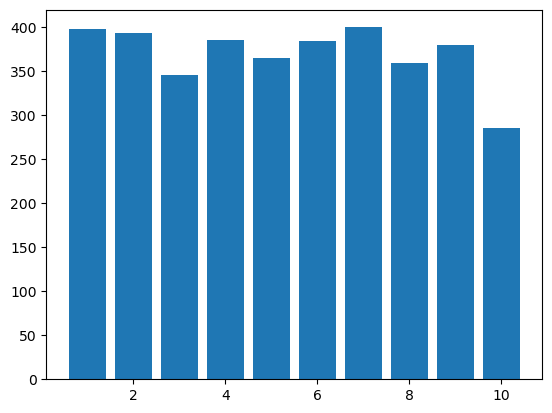

In [28]:
plt.bar(score, number)

In [29]:
decile_score=[]
for i, j in df.iterrows():
    if(j.race=='Caucasian'):
        decile_score.append(j.decile_score)

In [30]:
number=[]
for i in range(1,11):
    number.append(decile_score.count(i))

<BarContainer object of 10 artists>

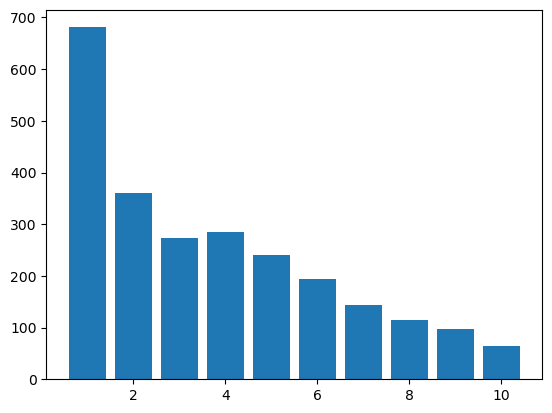

In [31]:
plt.bar(score, number)

## LOGISTIC REGRESSION

In [32]:
lr = LogisticRegression()

In [33]:
x

,sex,age_cat,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,c_days_from_compas,is_violent_recid,type_of_assessment,score_text
0,0,1,5,0,0,0,0,-1.0,1,1.0,0,0,0
1,0,0,0,0,0,0,0,-1.0,1,1.0,1,0,0
2,0,-1,0,0,0,1,4,-1.0,1,1.0,0,0,0
5,0,0,5,0,0,0,0,0.0,0,0.0,0,0,0
6,0,0,2,0,0,0,14,-1.0,1,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,0,-1,0,0,0,0,0,-1.0,1,1.0,0,0,1
7210,0,-1,0,0,0,0,0,-1.0,1,1.0,0,0,0
7211,0,1,5,0,0,0,0,-1.0,1,1.0,0,0,0
7212,1,0,0,0,0,0,3,-1.0,0,1.0,0,0,0


In [34]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr = LogisticRegression()


In [35]:
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print("Accuracy %.2f" %metrics.accuracy_score(y_test, y_predict))

Accuracy 0.73


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


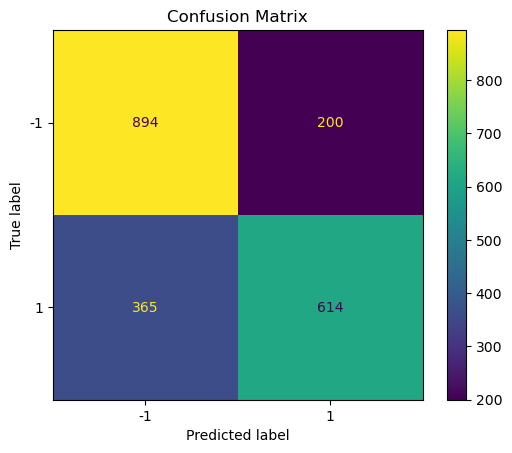

In [36]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(lr, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

In [37]:
importance = lr.coef_
# summarize feature importance
#for i in range(importance):
 #   print(importance[i])
for i,v in enumerate(importance):
    imp=importance[i]
i=0
for j in imp:
    print("feature:", j)
   # print('Feature: %0d, Score: %.5f' % (i,v))

feature: -0.449682072274904
feature: -0.3758893524831725
feature: -0.021707935358964328
feature: 0.1634676537327022
feature: -0.0974848656546036
feature: 0.13700491100709616
feature: 0.10740659830992814
feature: 0.0005327042841957239
feature: 0.3747521973548331
feature: -0.0005247640437030244
feature: 2.673159769252339
feature: 0.0
feature: 0.54971033589877


## RANDOM FOREST

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
decision_tree_error= 1-metrics.accuracy_score(y_test, y_pred)
print("Estimated test set error of the single decision tree",decision_tree_error)

Accuracy: 0.6753497346840328
Estimated test set error of the single decision tree 0.3246502653159672


In [39]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7018813314037626


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


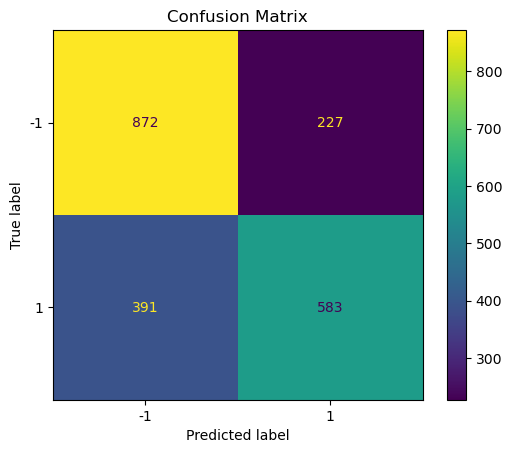

In [40]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(rf, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

## ADA BOOSTING

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [42]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)


In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7356488181379643


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


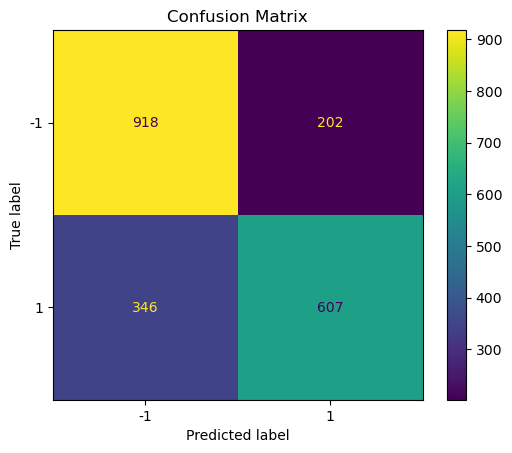

In [44]:
disp = plot_confusion_matrix(abc, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

## With just African-American and Caucasian

In [45]:
x= data.loc[:, ~data.columns.isin(['two_year_recid', 'race', 'Other', 'Asian','Hispanic','Native-American'])]
y = data['two_year_recid'].astype('int')

In [46]:
x

,sex,age_cat,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,c_days_from_compas,is_violent_recid,type_of_assessment,score_text,African-American,Caucasian
0,0,1,0,0,0,0,-1.0,1,1.0,0,0,0,0,0
1,0,0,0,0,0,0,-1.0,1,1.0,1,0,0,1,0
2,0,-1,0,0,1,4,-1.0,1,1.0,0,0,0,1,0
5,0,0,0,0,0,0,0.0,0,0.0,0,0,0,0,0
6,0,0,0,0,0,14,-1.0,1,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,0,-1,0,0,0,0,-1.0,1,1.0,0,0,1,1,0
7210,0,-1,0,0,0,0,-1.0,1,1.0,0,0,0,1,0
7211,0,1,0,0,0,0,-1.0,1,1.0,0,0,0,0,0
7212,1,0,0,0,0,3,-1.0,0,1.0,0,0,0,1,0


In [47]:
y

0      -1
1       1
2       1
5      -1
6       1
       ..
7209   -1
7210   -1
7211   -1
7212   -1
7213    1
Name: two_year_recid, Length: 6907, dtype: int64

### Logistic Regression

In [48]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print("Accuracy %.2f" %metrics.accuracy_score(y_test, y_predict))

Accuracy 0.72


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


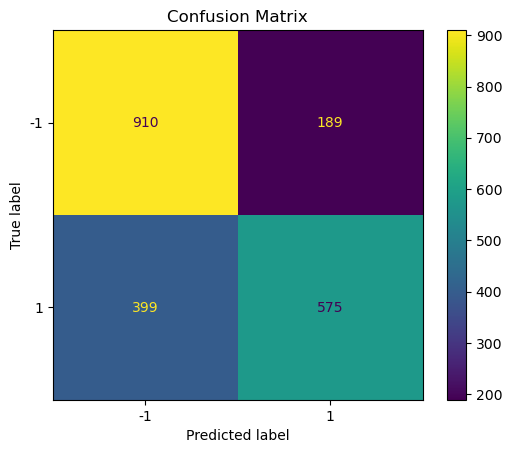

In [49]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(lr, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

In [50]:
importance = lr.coef_
# summarize feature importance
#for i in range(importance):
 #   print(importance[i])
for i,v in enumerate(importance):
    imp=importance[i]
i=0
for j in imp:
    print("feature:", j)
   # print('Feature: %0d, Score: %.5f' % (i,v))

feature: -0.3807830563837816
feature: -0.4459502787493282
feature: 0.22768594276512527
feature: -0.21829911599892715
feature: 0.28591201173964653
feature: 0.11853115094923436
feature: 0.0004739924905328179
feature: 0.3282217833429138
feature: -0.0004308236080431608
feature: 2.846518978478671
feature: 0.0
feature: 0.460271109058851
feature: -0.07675412514071203
feature: -0.0659541590142531


### Random-Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.693680656054028


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


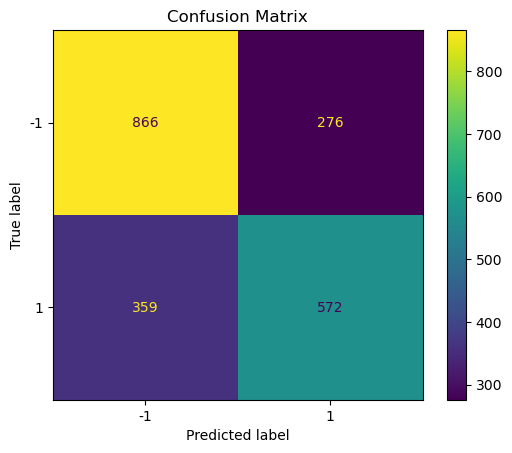

In [52]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(rf, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

### Ada-boost

In [53]:
from sklearn.ensemble import AdaBoostClassifier
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7342016401350699


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


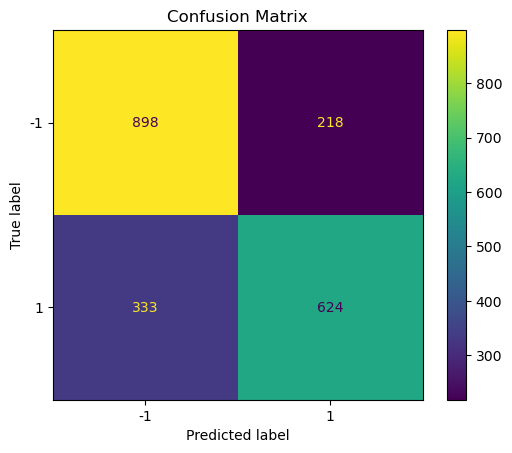

In [54]:
disp = plot_confusion_matrix(abc, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

## Without Race

In [55]:
x= data.loc[:, ~data.columns.isin(['two_year_recid', 'race', 'Other', 'Asian','Hispanic','Native-American','African-American','Caucasian'])]
y = data['two_year_recid'].astype('int')

In [56]:
x

,sex,age_cat,juv_fel_count,juv_misd_count,juv_other_count,priors_count,days_b_screening_arrest,c_charge_degree,c_days_from_compas,is_violent_recid,type_of_assessment,score_text
0,0,1,0,0,0,0,-1.0,1,1.0,0,0,0
1,0,0,0,0,0,0,-1.0,1,1.0,1,0,0
2,0,-1,0,0,1,4,-1.0,1,1.0,0,0,0
5,0,0,0,0,0,0,0.0,0,0.0,0,0,0
6,0,0,0,0,0,14,-1.0,1,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7209,0,-1,0,0,0,0,-1.0,1,1.0,0,0,1
7210,0,-1,0,0,0,0,-1.0,1,1.0,0,0,0
7211,0,1,0,0,0,0,-1.0,1,1.0,0,0,0
7212,1,0,0,0,0,3,-1.0,0,1.0,0,0,0


In [57]:
y

0      -1
1       1
2       1
5      -1
6       1
       ..
7209   -1
7210   -1
7211   -1
7212   -1
7213    1
Name: two_year_recid, Length: 6907, dtype: int64

### Logistic Regression

In [58]:
lr = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print("Accuracy %.2f" %metrics.accuracy_score(y_test, y_predict))

Accuracy 0.73


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


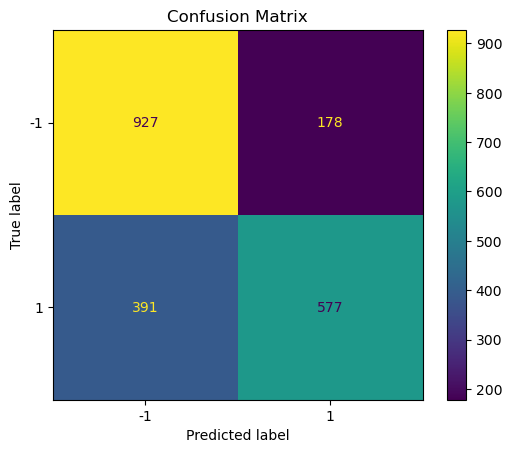

In [59]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(lr, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

In [60]:
importance = lr.coef_
# summarize feature importance
#for i in range(importance):
 #   print(importance[i])
for i,v in enumerate(importance):
    imp=importance[i]
i=0
for j in imp:
    print("feature:", j)
   # print('Feature: %0d, Score: %.5f' % (i,v))

feature: -0.20126253577846637
feature: -0.5250763302132475
feature: -0.021012765251366937
feature: -0.18199485509268531
feature: 0.26212595488542967
feature: 0.12126438177446182
feature: 0.0007669788233424232
feature: 0.20369026272429042
feature: -0.0004466959959101187
feature: 3.006206048868367
feature: 0.0
feature: 0.4955254395892574


### Random-Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6806560540279788


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


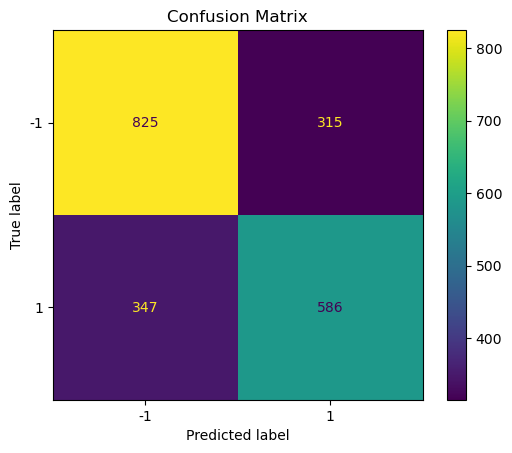

In [62]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
disp = plot_confusion_matrix(rf, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

### Ada- Boosting

In [63]:
from sklearn.ensemble import AdaBoostClassifier
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # 70% training and 30% test
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7260009647853353


/Users/mehersuneelmeesala/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


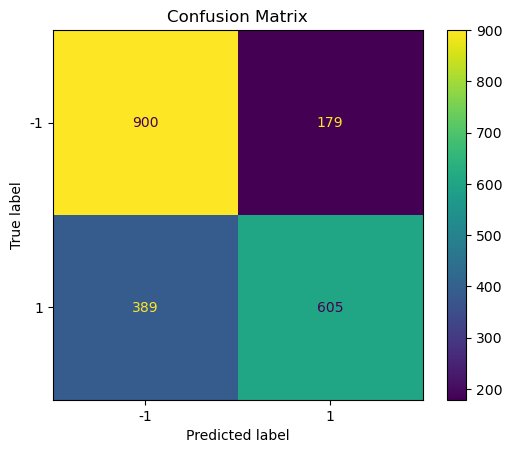

In [64]:
disp = plot_confusion_matrix(abc, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()